In [4]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

Part 1 – Basic Data Understanding (Pandas)

In [5]:
df = pd.read_csv(r'D:\git\netflix\netflix_titles.csv')

In [6]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [7]:
df.shape

(8807, 12)

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
display(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
display(df.duplicated().sum())

np.int64(0)

In [12]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [14]:
most_frequent_country = df['country'].value_counts().index[0]
print(f"The most frequent country is: {most_frequent_country}")

The most frequent country is: United States


Part 2 – EDA (Exploratory Data Analysis)

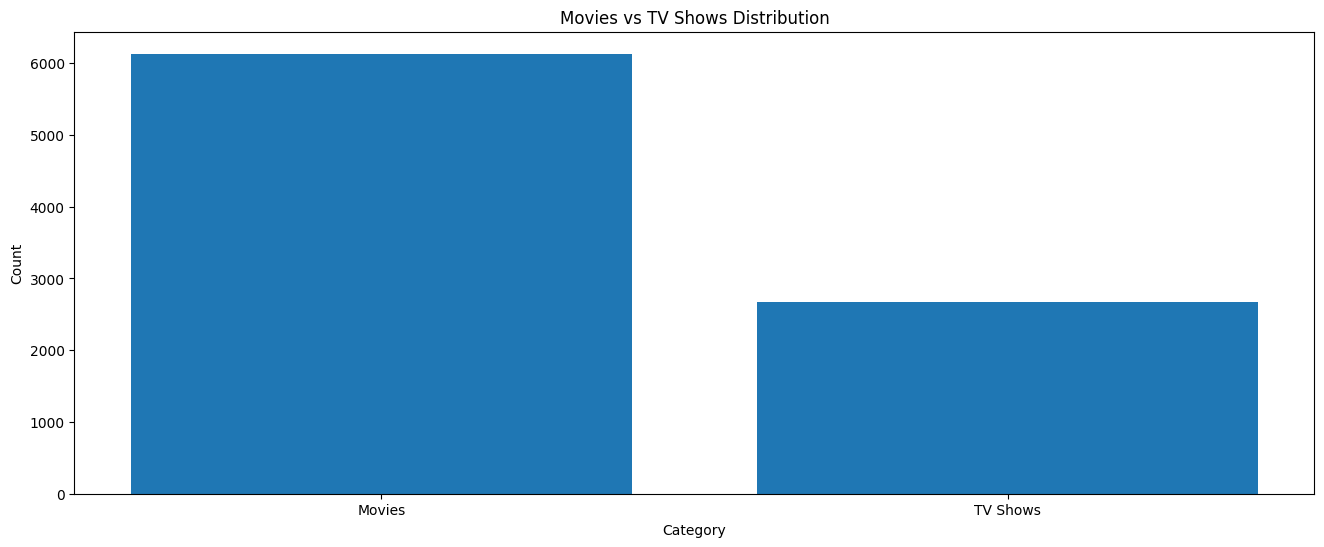

In [15]:
movie_count = df['type'].value_counts()['Movie']
tvshows_count = df['type'].value_counts()['TV Show']
plt.figure(figsize=(16, 6))
plt.bar(['Movies', 'TV Shows'], [movie_count, tvshows_count])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Movies vs TV Shows Distribution')
plt.show()

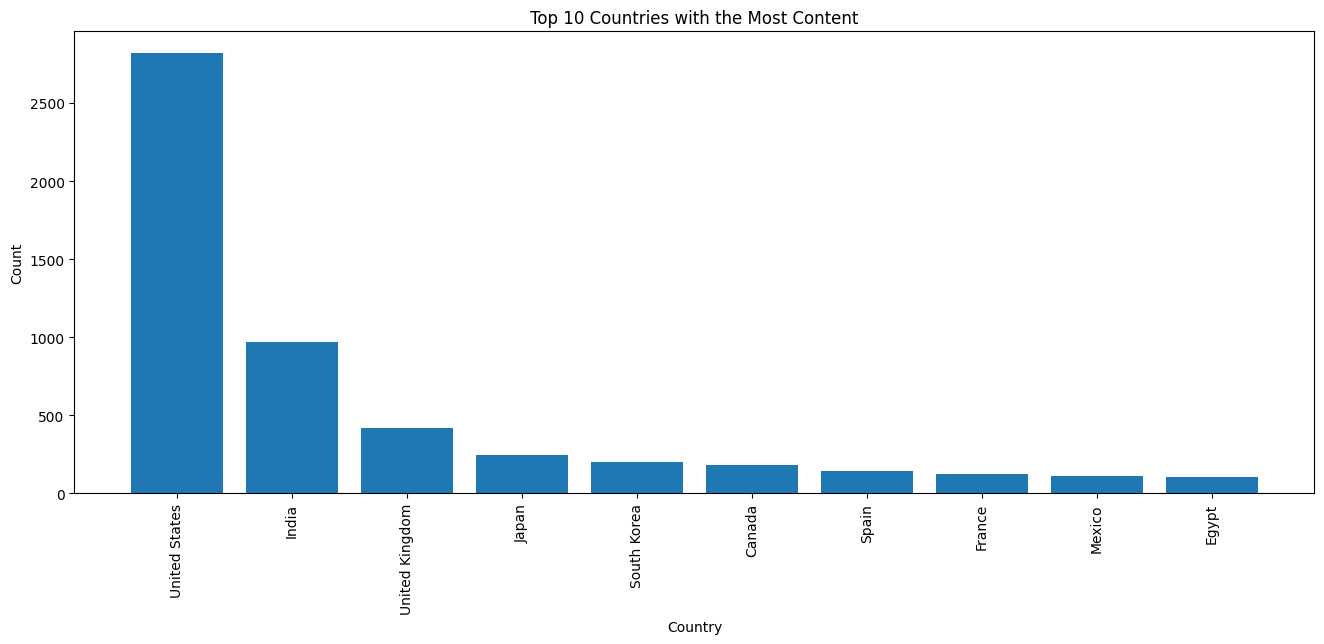

In [16]:
country = df['country'].value_counts()

plt.figure(figsize=(16, 6))
plt.bar(country.index[:10], country.values[:10])
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries with the Most Content')
plt.xticks(rotation=90)
plt.show()

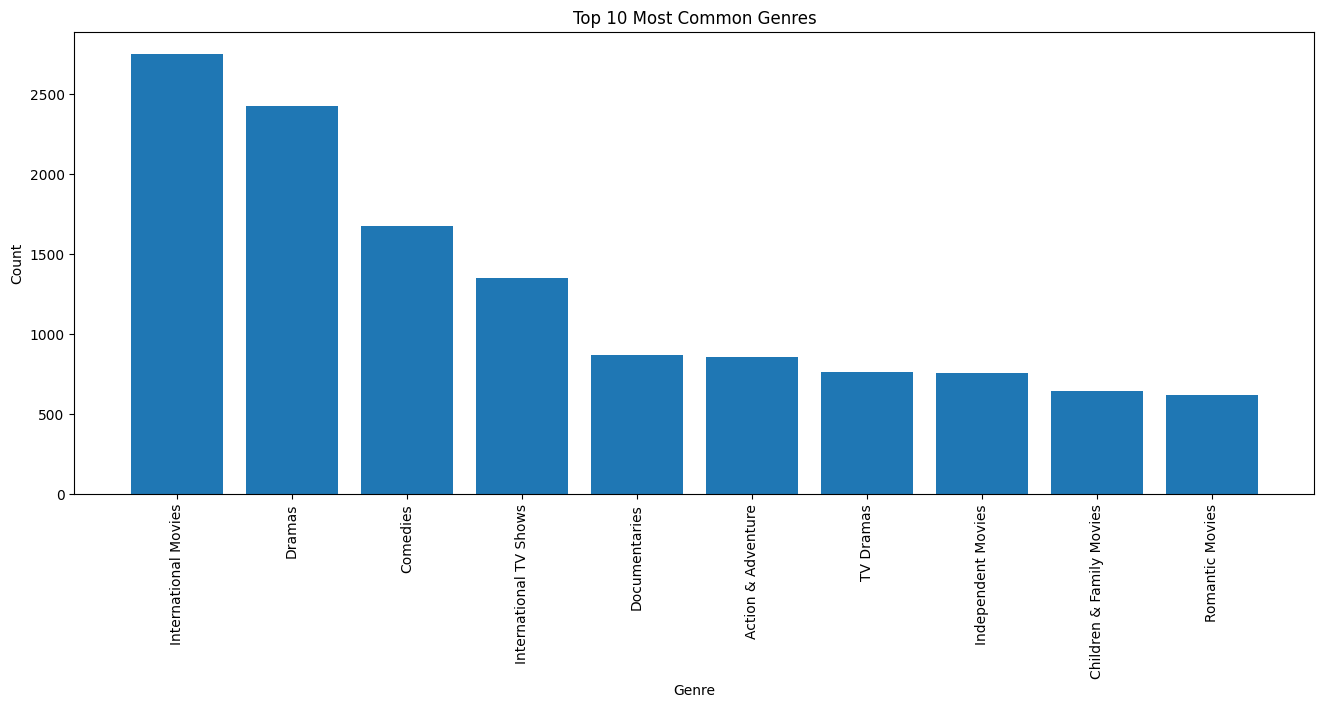

In [17]:
genre_counts = df['listed_in'].str.split(',').explode().str.strip().value_counts()

plt.figure(figsize=(16, 6))
plt.bar(genre_counts.index[:10], genre_counts.values[:10])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Most Common Genres')
plt.xticks(rotation=90)
plt.show()

In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Netflix Content Growth by Release Year:


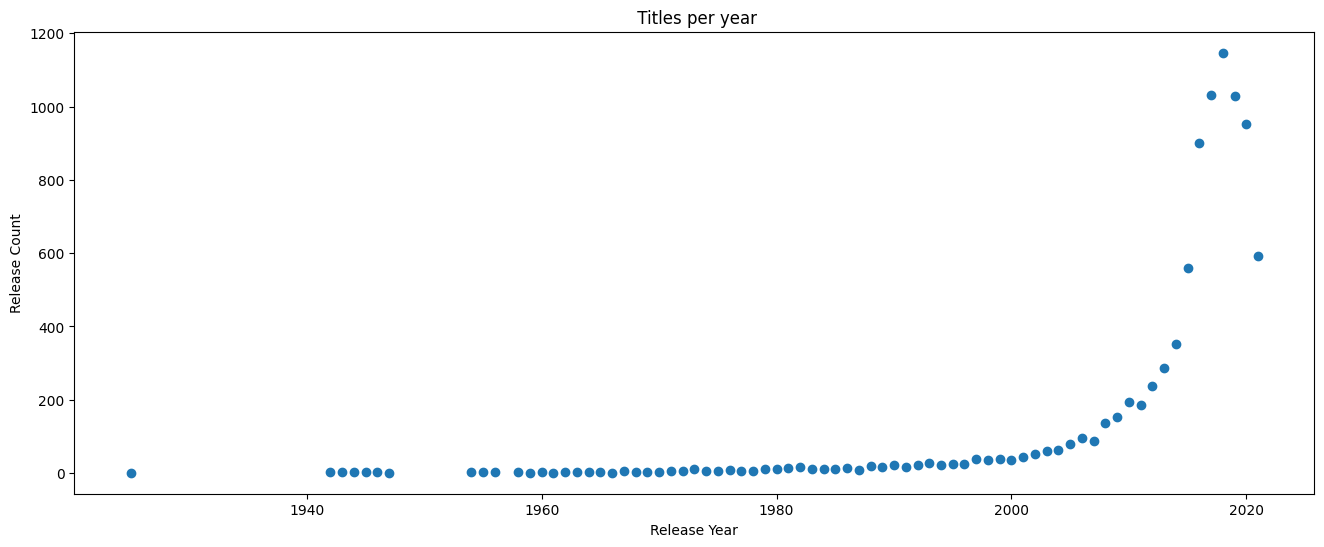

In [19]:
plt.figure(figsize=(16, 6))
content_growth = df.groupby('release_year').size().reset_index(name='count')
print("Netflix Content Growth by Release Year:")
plt.scatter(content_growth['release_year'],content_growth['count'])
plt.xlabel('Release Year')
plt.ylabel('Release Count')
plt.title(' Titles per year')
plt.show()

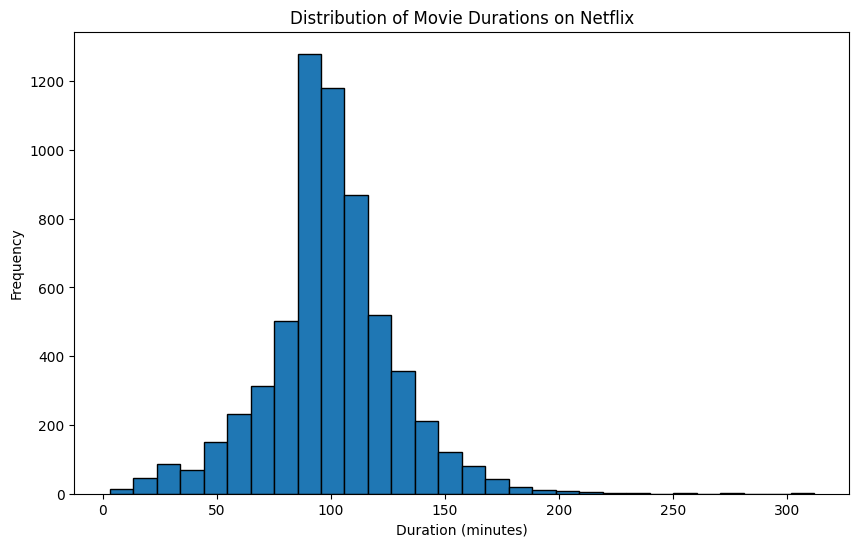

In [20]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(10, 6))
plt.hist(movies_df['duration_minutes'], bins=30, edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations on Netflix')
plt.show()

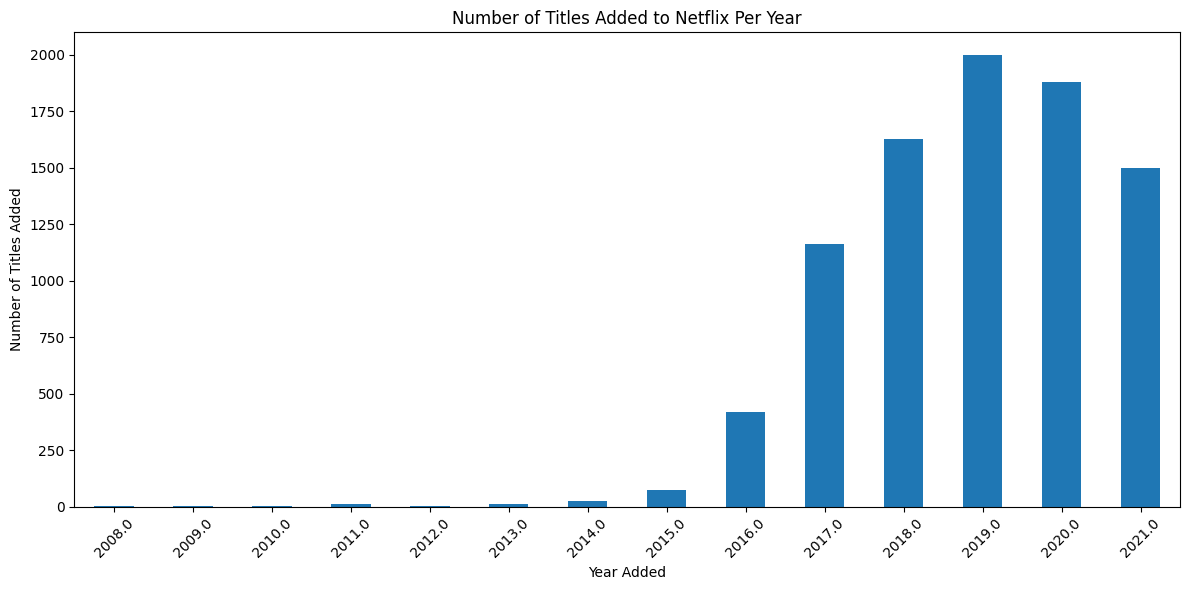

In [21]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
titles_per_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
titles_per_year.plot(kind='bar')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.title('Number of Titles Added to Netflix Per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
year_highest_releases = titles_per_year.idxmax()
count_highest_releases = titles_per_year.max()

print(f"The year with the highest number of releases is: {year_highest_releases} with {count_highest_releases} titles.")

The year with the highest number of releases is: 2019.0 with 1999 titles.


Part 3 – Statistics

In [23]:
df['release_year'].mode()

0    2018
Name: release_year, dtype: int64

In [24]:
int(df['release_year'].median())

2017

In [25]:
int(df['release_year'].mean())

2014

In [26]:
df['release_year'].var()

np.float64(77.78026646107516)

In [27]:
df['release_year'].std()

np.float64(8.819312130833966)

In [28]:
most_recent_year = df['year_added'].max()
start_year_last_5 = most_recent_year - 4
titles_last_5_years = df[df['year_added'] >= start_year_last_5]
percentage_last_5_years = (len(titles_last_5_years) / len(df)) * 100
print(f"Percentage of titles added in the last 5 years ({start_year_last_5}-{most_recent_year}): {percentage_last_5_years:.2f}%")

Percentage of titles added in the last 5 years (2017.0-2021.0): 92.70%


In [29]:
movies_df = df[df['type'] == 'Movie']
tvshows_df = df[df['type'] == 'TV Show']
most_common_movie_rating = movies_df['rating'].value_counts().idxmax()
most_common_tvshow_rating = tvshows_df['rating'].value_counts().idxmax()

print(f"The most common rating for Movies is: {most_common_movie_rating}")
print(f"The most common rating for TV Shows is: {most_common_tvshow_rating}")

The most common rating for Movies is: TV-MA
The most common rating for TV Shows is: TV-MA


Part 4 – Linear Algebra & NumPy

In [30]:
year = np.array(df['release_year'])
year

array([2020, 2021, 2021, ..., 2009, 2006, 2015], shape=(8807,))

In [31]:
is_movie = np.where(df['type']=="Movie",1,0)
is_movie

array([1, 0, 0, ..., 1, 1, 1], shape=(8807,))

In [32]:
add = year + is_movie
add

array([2021, 2021, 2021, ..., 2010, 2007, 2016], shape=(8807,))

In [33]:
dot = year.dot(is_movie)
dot

np.int64(12342448)

In [34]:
matrix = np.array([year,is_movie])
matrix_multiply = matrix * np.array([0.6,0.4]).reshape(-1, 1)
display(matrix_multiply)

array([[1.2120e+03, 1.2126e+03, 1.2126e+03, ..., 1.2054e+03, 1.2036e+03,
        1.2090e+03],
       [4.0000e-01, 0.0000e+00, 0.0000e+00, ..., 4.0000e-01, 4.0000e-01,
        4.0000e-01]], shape=(2, 8807))

In [35]:
norm = np.linalg.norm(df['release_year'])
print("Norm:", norm)

v_normalized = df['release_year'] / norm
print(v_normalized)

print(np.linalg.norm(v_normalized))

Norm: 189023.79698598798
0       0.010686
1       0.010692
2       0.010692
3       0.010692
4       0.010692
          ...   
8802    0.010618
8803    0.010676
8804    0.010628
8805    0.010612
8806    0.010660
Name: release_year, Length: 8807, dtype: float64
0.9999999999999994


Part 5 – Calculus

In [36]:
year_sym = sp.symbols('year')

In [37]:
Popularity_Score_sym = year_sym + 0.5*(year_sym - 2000)**2
diff = sp.diff(Popularity_Score_sym, year_sym)
display(diff)

1.0*year - 1999.0

Part 6 – Feature Engineering

In [38]:
df['age'] =  2025 - df['release_year']

In [39]:
df['is_movie'] = is_movie

In [40]:
df['recent_releases'] = df['year_added'].apply(lambda x: 1 if x >= 2020 else 0)

In [41]:
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(',')))

In [42]:
df['release_year_quartile'] = pd.qcut(df['release_year'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
display(df[['title', 'release_year', 'release_year_quartile']].head())

quartile_ranges = df.groupby('release_year_quartile')['release_year'].agg(['min', 'max'])
print("Range of release years for each quartile:")
quartile_ranges

,title,release_year,release_year_quartile
0,Dick Johnson Is Dead,2020,Q4
1,Blood & Water,2021,Q4
2,Ganglands,2021,Q4
3,Jailbirds New Orleans,2021,Q4
4,Kota Factory,2021,Q4


Range of release years for each quartile:


C:\Users\karthikeyan.s\AppData\Local\Temp\ipykernel_14360\102438254.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_ranges = df.groupby('release_year_quartile')['release_year'].agg(['min', 'max'])


,min,max
release_year_quartile,,
Q1,1925,2013
Q2,2014,2017
Q3,2018,2019
Q4,2020,2021


In [43]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,age,is_movie,recent_releases,num_genres,release_year_quartile
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,5,1,1,1,Q4
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,4,0,1,3,Q4
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,4,0,1,3,Q4
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,4,0,1,2,Q4
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,4,0,1,3,Q4


Part 7 – SQL Simulation in Pandas

In [44]:
recent_movies = df[(df['type'] == 'Movie') & (df['release_year'] > 2015)]
recent_movies['title']

0                   Dick Johnson Is Dead
6       My Little Pony: A New Generation
9                           The Starling
12                          Je Suis Karl
13      Confessions of an Invisible Girl
                      ...               
8781             Yo-Kai Watch: The Movie
8782                         Yoga Hosers
8786                        You Can Tutu
8787           You Can’t Fight Christmas
8794                              اشتباك
Name: title, Length: 3619, dtype: object

In [45]:
movies_df = df[df['type'] == 'Movie'].copy()
sorted_movies = movies_df.sort_values(by=['release_year', 'title'], ascending=[False, True])
display(sorted_movies.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,age,is_movie,recent_releases,num_genres,release_year_quartile
1150,s1151,Movie,7 Yards: The Chris Norton Story,Jonathon Link,Chris Norton,United States,2021-03-30,2021,TV-PG,93 min,Documentaries,The true story of former college football play...,2021.0,4,1,1,1,Q4
850,s851,Movie,99 Songs,Vishwesh Krishnamoorthy,"Ehan Bhat, Edilsy Vargas, Manisha Koirala, Lis...",India,2021-05-21,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...,2021.0,4,1,1,3,Q4
851,s852,Movie,99 Songs (Tamil),NaN,NaN,NaN,2021-05-21,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...,2021.0,4,1,1,3,Q4
852,s853,Movie,99 Songs (Telugu),NaN,NaN,NaN,2021-05-21,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...,2021.0,4,1,1,3,Q4
404,s405,Movie,9to5: The Story of a Movement,NaN,NaN,NaN,2021-07-22,2021,TV-MA,85 min,Documentaries,"In this documentary, female office workers in ...",2021.0,4,1,1,1,Q4


In [46]:
top_5_countries = df['country'].value_counts().head(5)
display(top_5_countries)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: count, dtype: int64

In [47]:
titles_2000_2010 = df[(df['release_year'] >= 2000) & (df['release_year'] <= 2010)]
titles_2000_2010['title']

27                                              Grown Ups
48                                           Training Day
51      InuYasha the Movie 2: The Castle Beyond the Lo...
52      InuYasha the Movie 3: Swords of an Honorable R...
53        InuYasha the Movie 4: Fire on the Mystic Island
                              ...                        
8793                                 Yours, Mine and Ours
8799                                                Zenda
8802                                               Zodiac
8804                                           Zombieland
8805                                                 Zoom
Name: title, Length: 1004, dtype: object

In [48]:
drama_titles_count = df['listed_in'].str.contains('Drama', na=False).sum()
print(f"Number of titles with 'Drama' in listed_in: {drama_titles_count}")

Number of titles with 'Drama' in listed_in: 3190
